In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd  

In [2]:
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=7)

In [6]:
def LookupTable(value):
    classes = {
            'Primary vegetation':0,
            'Pasture':2,
            'Cropland':3,
            'Secondary vegetation (indeterminate age)':0,
            'Plantation forest':0,
            'Intermediate secondary vegetation':0,
            'Young secondary vegetation':0,
            'Mature secondary vegetation':0,
            'Urban':0,
            'Cannot decide':0,
    }
    mainClass = {
            '0':'Other',
            '1':'Natural and Semi-natural grass',
            '2':'Seeded grass',
            '3':'Crops and other related agricultural practices',
    }
    
    result = mainClass[str(classes[value])]
    return result


### Get data from Predicts

In [8]:
from timeit import default_timer as timer   


originalData = '../datasets/06_PREDICTS/resource.csv'
cluster = pd.read_csv(originalData,sep=",",chunksize=10 ** 20)

df = pd.DataFrame()
for row in cluster:
     df = pd.concat([df,row])

df.reset_index()
df

/tmp/ipykernel_3438/4153691127.py:8: DtypeWarning: Columns (3,19,22,47,62,66) have mixed types. Specify dtype option on import or set low_memory=False.
  for row in cluster:


,_id,Best_guess_binomial,Biome,Block,Class,COL_ID,Coordinates_method,Country,Country_distance_metres,Diversity_metric,...,Study_number,Taxon,Taxon_name_entered,Taxon_number,Transect_details,UN_region,UN_subregion,Use_intensity,Wilderness_area,Years_since_fragmentation_or_conversion
0,124004,Stomis pumicatus,Temperate Broadleaf & Mixed Forests,D-QFP,Insecta,13025857,Direct from publication / author,Germany,0.0,abundance,...,19,Carabidae,Stomis pumicatus,223,NaN,Europe,Western Europe,Intense use,NaN,NaN
1,216003,Teucrium chamaedrys,Temperate Broadleaf & Mixed Forests,NaN,Magnoliopsida,11781421,Direct from publication / author,Turkey,0.0,occurrence,...,1,Teucrium chamaedrys,Teucrium chamaedrys,92,NaN,Asia,Western Asia,Light use,NaN,NaN
2,216001,Salvia cryptantha,Temperate Broadleaf & Mixed Forests,NaN,Magnoliopsida,13146200,Direct from publication / author,Turkey,0.0,occurrence,...,1,Salvia,Salvia cryptantha,90,NaN,Asia,Western Asia,Light use,NaN,NaN
3,94001,Agraecina striata,Temperate Broadleaf & Mixed Forests,E-VII,Arachnida,13212944,Direct from publication / author,Estonia,0.0,abundance,...,17,Agraecina,Agraecina striata,10,NaN,Europe,Northern Europe,Intense use,NaN,NaN
4,188005,Richardia brasiliensis,Tropical & Subtropical Moist Broadleaf Forests,NaN,Magnoliopsida,9724658,Direct from publication / author,South Africa,0.0,effort-corrected abundance,...,2,Richardia brasiliensis,Richardia brasiliensis,48,NaN,Africa,Southern Africa,Minimal use,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250399,3250365,Duttaphrynus melanostictus,Tropical & Subtropical Moist Broadleaf Forests,3.0,Amphibia,7159537,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Duttaphrynus melanostictus,Duttaphrynus melanostictus,9,NaN,Asia,Eastern Asia,Minimal use,NaN,45.0
3250400,3250375,Gekko chinensis,Tropical & Subtropical Moist Broadleaf Forests,4.0,Reptilia,4461844,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Gekko chinensis,Gekko chinensis,3,NaN,Asia,Eastern Asia,Minimal use,NaN,50.0
3250401,3250379,Sphenomorphus indicus,Tropical & Subtropical Moist Broadleaf Forests,4.0,Reptilia,4465640,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Sphenomorphus indicus,Sphenomorphus indicus,7,NaN,Asia,Eastern Asia,Minimal use,NaN,50.0
3250402,3250381,Duttaphrynus melanostictus,Tropical & Subtropical Moist Broadleaf Forests,4.0,Amphibia,7159537,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Duttaphrynus melanostictus,Duttaphrynus melanostictus,9,NaN,Asia,Eastern Asia,Minimal use,NaN,50.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250404 entries, 0 to 3250403
Data columns (total 68 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   _id                                      int64  
 1   Best_guess_binomial                      object 
 2   Biome                                    object 
 3   Block                                    object 
 4   Class                                    object 
 5   COL_ID                                   int64  
 6   Coordinates_method                       object 
 7   Country                                  object 
 8   Country_distance_metres                  float64
 9   Diversity_metric                         object 
 10  Diversity_metric_is_effort_sensitive     bool   
 11  Diversity_metric_is_suitable_for_Chao    bool   
 12  Diversity_metric_type                    object 
 13  Diversity_metric_unit                    object 
 14  Ecoregion         

In [10]:
(round((df.isnull().sum()/df.shape[0])*100,2)).head(60)

_id                                       0.00
Best_guess_binomial                      20.55
Biome                                     0.00
Block                                    54.10
Class                                     0.49
COL_ID                                    0.00
Coordinates_method                        0.00
Country                                   0.00
Country_distance_metres                   0.00
Diversity_metric                          0.00
Diversity_metric_is_effort_sensitive      0.00
Diversity_metric_is_suitable_for_Chao     0.00
Diversity_metric_type                     0.00
Diversity_metric_unit                     0.00
Ecoregion                                 0.00
Ecoregion_distance_metres                 0.00
Effort_corrected_measurement              0.00
Family                                    2.36
Genus                                    16.53
Habitat_as_described                     27.67
Habitat_patch_area_square_metres         76.89
Higher_taxon 

In [11]:
df.isnull().sum().head(60)

_id                                            0
Best_guess_binomial                       667855
Biome                                          0
Block                                    1758550
Class                                      15823
COL_ID                                         0
Coordinates_method                             0
Country                                        0
Country_distance_metres                        0
Diversity_metric                               0
Diversity_metric_is_effort_sensitive           0
Diversity_metric_is_suitable_for_Chao          0
Diversity_metric_type                          0
Diversity_metric_unit                          0
Ecoregion                                      0
Ecoregion_distance_metres                      0
Effort_corrected_measurement                   0
Family                                     76860
Genus                                     537408
Habitat_as_described                      899249
Habitat_patch_area_s

In [12]:
df['_id'] = df.index
df

,_id,Best_guess_binomial,Biome,Block,Class,COL_ID,Coordinates_method,Country,Country_distance_metres,Diversity_metric,...,Study_number,Taxon,Taxon_name_entered,Taxon_number,Transect_details,UN_region,UN_subregion,Use_intensity,Wilderness_area,Years_since_fragmentation_or_conversion
0,0,Stomis pumicatus,Temperate Broadleaf & Mixed Forests,D-QFP,Insecta,13025857,Direct from publication / author,Germany,0.0,abundance,...,19,Carabidae,Stomis pumicatus,223,NaN,Europe,Western Europe,Intense use,NaN,NaN
1,1,Teucrium chamaedrys,Temperate Broadleaf & Mixed Forests,NaN,Magnoliopsida,11781421,Direct from publication / author,Turkey,0.0,occurrence,...,1,Teucrium chamaedrys,Teucrium chamaedrys,92,NaN,Asia,Western Asia,Light use,NaN,NaN
2,2,Salvia cryptantha,Temperate Broadleaf & Mixed Forests,NaN,Magnoliopsida,13146200,Direct from publication / author,Turkey,0.0,occurrence,...,1,Salvia,Salvia cryptantha,90,NaN,Asia,Western Asia,Light use,NaN,NaN
3,3,Agraecina striata,Temperate Broadleaf & Mixed Forests,E-VII,Arachnida,13212944,Direct from publication / author,Estonia,0.0,abundance,...,17,Agraecina,Agraecina striata,10,NaN,Europe,Northern Europe,Intense use,NaN,NaN
4,4,Richardia brasiliensis,Tropical & Subtropical Moist Broadleaf Forests,NaN,Magnoliopsida,9724658,Direct from publication / author,South Africa,0.0,effort-corrected abundance,...,2,Richardia brasiliensis,Richardia brasiliensis,48,NaN,Africa,Southern Africa,Minimal use,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250399,3250399,Duttaphrynus melanostictus,Tropical & Subtropical Moist Broadleaf Forests,3.0,Amphibia,7159537,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Duttaphrynus melanostictus,Duttaphrynus melanostictus,9,NaN,Asia,Eastern Asia,Minimal use,NaN,45.0
3250400,3250400,Gekko chinensis,Tropical & Subtropical Moist Broadleaf Forests,4.0,Reptilia,4461844,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Gekko chinensis,Gekko chinensis,3,NaN,Asia,Eastern Asia,Minimal use,NaN,50.0
3250401,3250401,Sphenomorphus indicus,Tropical & Subtropical Moist Broadleaf Forests,4.0,Reptilia,4465640,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Sphenomorphus indicus,Sphenomorphus indicus,7,NaN,Asia,Eastern Asia,Minimal use,NaN,50.0
3250402,3250402,Duttaphrynus melanostictus,Tropical & Subtropical Moist Broadleaf Forests,4.0,Amphibia,7159537,Direct from publication / author,Hong Kong,0.0,abundance,...,1,Duttaphrynus melanostictus,Duttaphrynus melanostictus,9,NaN,Asia,Eastern Asia,Minimal use,NaN,50.0


In [13]:
df[(df.Longitude == '') & (df.Latitude == '')]

,_id,Best_guess_binomial,Biome,Block,Class,COL_ID,Coordinates_method,Country,Country_distance_metres,Diversity_metric,...,Study_number,Taxon,Taxon_name_entered,Taxon_number,Transect_details,UN_region,UN_subregion,Use_intensity,Wilderness_area,Years_since_fragmentation_or_conversion


In [14]:
(df.Predominant_land_use.value_counts()/df.shape[0])*100

Predominant_land_use
Primary vegetation                          37.227249
Pasture                                     15.549021
Cropland                                    11.673995
Secondary vegetation (indeterminate age)     8.479131
Plantation forest                            7.610039
Intermediate secondary vegetation            7.031003
Young secondary vegetation                   6.478579
Mature secondary vegetation                  3.993873
Urban                                        1.752613
Cannot decide                                0.204498
Name: count, dtype: float64

In [15]:
df.duplicated().sum()

0

In [16]:
(df.Source_for_predominant_land_use.value_counts()/df.shape[0])*100

Source_for_predominant_land_use
Direct from publication / author    91.777053
Google maps                          0.722802
Name: count, dtype: float64

In [17]:
lulc = df.copy()
lulc['dataset_name'] = 'Predicts'
lulc['reference_year'] = lulc['Sample_end_latest'].apply(lambda x: x.split('-')[0])
lulc['gpw_lulc_class'] = lulc['Predominant_land_use'].apply(lambda x: LookupTable(x))
lulc['sample_weight'] = 1

lulc.rename(columns={'Predominant_land_use':'original_lulc_class'},inplace=True)

lulc = lulc[['Longitude','Latitude','dataset_name','reference_year','original_lulc_class','gpw_lulc_class','sample_weight']]
lulc

,Longitude,Latitude,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight
0,11.723056,51.377500,Predicts,2002,Cropland,Crops and other related agricultural practices,1
1,32.662350,39.600839,Predicts,2003,Pasture,Seeded grass,1
2,32.662350,39.600839,Predicts,2003,Pasture,Seeded grass,1
3,25.640556,58.334444,Predicts,2002,Cropland,Crops and other related agricultural practices,1
4,30.263603,-30.729319,Predicts,2011,Primary vegetation,Other,1
...,...,...,...,...,...,...,...
3250399,114.093978,22.402544,Predicts,2010,Plantation forest,Other,1
3250400,114.180969,22.425128,Predicts,2010,Mature secondary vegetation,Other,1
3250401,114.180969,22.425128,Predicts,2010,Mature secondary vegetation,Other,1
3250402,114.180969,22.425128,Predicts,2010,Mature secondary vegetation,Other,1


In [18]:
lulc.describe(include='object').T

,count,unique,top,freq
dataset_name,3250404,1,Predicts,3250404
reference_year,3250404,28,2000,441154
original_lulc_class,3250404,10,Primary vegetation,1210036
gpw_lulc_class,3250404,3,Other,2365546


In [19]:
lulc.describe()

,Longitude,Latitude,sample_weight
count,3.242552e+06,3.242552e+06,3250404.0
mean,2.555106e+01,9.180401e+00,1.0
std,8.215749e+01,3.189834e+01,0.0
min,-1.553527e+02,-5.496869e+01,1.0
25%,-4.839785e+01,-7.857117e+00,1.0
50%,9.465859e+00,6.046933e+00,1.0
75%,1.161534e+02,4.033881e+01,1.0
max,1.775108e+02,7.047773e+01,1.0


In [11]:
lulc.duplicated(subset=['Longitude', 'Latitude']).sum()

3233776

In [20]:
lulc.drop_duplicates(subset=['Longitude', 'Latitude'],inplace=True)

In [21]:
lulc.shape

(16628, 7)

In [22]:
lulc.isnull().sum()

Longitude              1
Latitude               1
dataset_name           0
reference_year         0
original_lulc_class    0
gpw_lulc_class         0
sample_weight          0
dtype: int64

<AxesSubplot:>

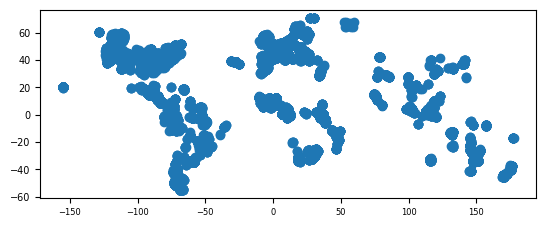

In [23]:
crs = "EPSG:4326"
newdf = gpd.GeoDataFrame(lulc, geometry=gpd.points_from_xy(lulc.Longitude, lulc.Latitude),crs=crs)
newdf.plot()

In [25]:
newdf['observation'] = ''

In [26]:
newdf.iloc[:,2:]

,dataset_name,reference_year,original_lulc_class,gpw_lulc_class,sample_weight,geometry,observation
0,Predicts,2002,Cropland,Crops and other related agricultural practices,1,POINT (11.72306 51.37750),
1,Predicts,2003,Pasture,Seeded grass,1,POINT (32.66235 39.60084),
3,Predicts,2002,Cropland,Crops and other related agricultural practices,1,POINT (25.64056 58.33444),
4,Predicts,2011,Primary vegetation,Other,1,POINT (30.26360 -30.72932),
14,Predicts,2011,Primary vegetation,Other,1,POINT (30.27369 -30.73199),
...,...,...,...,...,...,...,...
3244025,Predicts,2009,Plantation forest,Other,1,POINT (99.95225 23.01075),
3245360,Predicts,2010,Mature secondary vegetation,Other,1,POINT (114.13702 22.27936),
3245415,Predicts,2010,Mature secondary vegetation,Other,1,POINT (114.14667 22.38993),
3245450,Predicts,2010,Mature secondary vegetation,Other,1,POINT (114.09398 22.40254),


In [27]:
srcout = '/media/bernard/Data/LAPIG/Doutorado/Global_Pasture_Watch/datasets/harmonized_databases/06_db_predicts.parquet'
newdf.iloc[:,2:].to_parquet(srcout)